<a href="https://colab.research.google.com/github/Shk-tech/my-colab-learning-material/blob/main/2507_korea_pytorch01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# PyTorch - 딥러닝 프레임워크
# 프레임워크 - OS는 아니지만 OS처럼 동작할 때.
# 생태계, asdf.pt -> 모델 파일이 exe파일처럼 동작...

# PyTorch(흥) <- TensorFlow(망)
# YOLO, ... 여러 중요한 최신의 모델들이 PyTorch로 개발...
# 인체의 관절-github - PyTorch, TensorFlow(Keras)

# 딥러닝
# 학습용 framework   추론용 framework
# PyTorch           TfLite, onnx-runtime, CoreML(iOS), ncnn, ....

# 학습용
# 학습데이터를 모아서 전처리, feeding, 성능평가, 새로운 타입의 연산
# Intel CPU, NVidia GPU

# 추론용
# 실행. 최적화
# various CPU, various GPU

# ex) 얼굴을 이용해서 나이를
# 얼굴image data - 전처리 feeding 학습, 모델을 생성.. model.pt
# -> Android에서 써야 되는데... android에 pytorch를 설치???
#    돌리기만 하면된다.
#    model.pt -> model.onnx 변환, onnx-runtime

In [ ]:
# PyTorch
# 넘파이의 다른 버전 - numpy의 기능 전부 포함 + 딥러닝...
# GPU를 아주 쉽게 쓸 수 있는 GPU 라이브러리.
# 미분...

In [ ]:
import torch
#np.array
a = torch.tensor([1, 2, 3])
a * 2 + 1

import numpy as np
b = np.array([4, 5, 6])
a + torch.tensor(b) #numpy.array -> torch.tensor 명시적 형변환

tensor([5, 7, 9])

In [ ]:
# torch.tensor <-> np.array
np.array(a) + b
a.numpy() + b

array([5, 7, 9])

In [ ]:
# .. 미분.. torch
# error(머신러닝), loss(신경망), cost(경사하강법)
# 경사하강법 : cost에 대한 미분값을 이용해서 최저점을 찾아가는 방식
# theta(t+1) = theta(t) - eta * grad    ... optimizer
# eta : 학습률 (learning rate)

In [ ]:
#f(x, y) = 2 * x **2 + x * y + 3 * y
#x=1, y=2 일때 기울기(x, y) 를 구하시오
x = torch.tensor(1., requires_grad=True) # 미지수... 지만
y = torch.tensor(2., requires_grad=True)
z = 2 * x**2 + x * y + 3 * y
x.grad = None
y.grad = None
z.backward()
x.grad, y.grad

(tensor(6.), tensor(4.))

In [ ]:
# requires_grad 옵션 : 미분을 위한 중간 결과를 다 저장하라
# tensor(10., grad_fn=<AddBackward0>)
#             단순한 10이 아니라 10을 만들기 위한 중간 결과를 다 저장하고 있다.
# z.backward() -> 10에 대한 미분 x ... 10을 만들기 위한 계산에 대한 미분

# 후퇴 자동 기호 미분

tensor(10., grad_fn=<AddBackward0>)

In [ ]:
z = 2 * x**2 + x * y + 3 * y
z.backward()
x.grad, y.grad

(tensor(72.), tensor(48.))

In [ ]:
# f(x) = 3*x**2 + x + 2
# x=1일 때의 f(x)의 기울기를 구하시오.
x = torch.tensor(1., requires_grad=True)
z = 3*x**2 + x + 2
x.grad = None
z.backward()
x.grad

tensor(7.)

# 경사하강법

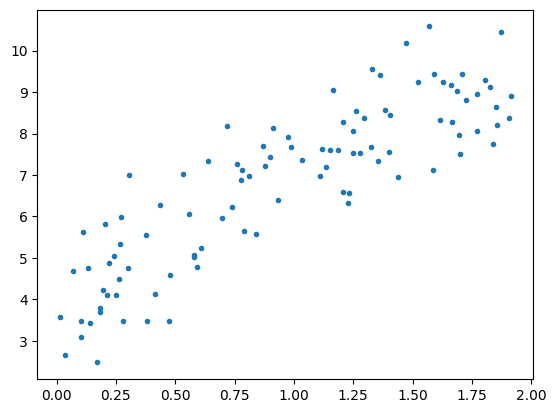

In [ ]:
#artificial f(x) = 3x + 4
m = 100
x = torch.rand(m, 1) * 2
y = 3 * x + 4 + torch.randn(m, 1)
import matplotlib.pyplot as plt
plt.plot(x, y.numpy(), '.') # plt는 내부적으로 numpy로 묵시적 형변환

In [ ]:
loader = torch.utils.data.DataLoader(list(zip(x, y)), batch_size=10, shuffle=True)
for xi, yi in loader:
    break
xi #10, 1

tensor([[1.5673],
        [0.4366],
        [1.4049],
        [0.1341],
        [0.9005],
        [0.2041],
        [1.6997],
        [0.4772],
        [0.2694],
        [0.9888]])

In [ ]:
torch.linalg.lstsq(torch.cat([x, x**0], axis=1), y)

torch.return_types.linalg_lstsq(
solution=tensor([[2.9285],
        [3.9960]]),
residuals=tensor([]),
rank=tensor(2),
singular_values=tensor([]))

In [ ]:
# 경사하강법...
# 파라미터를 초기화
a = torch.randn((), requires_grad=True)
b = torch.randn((), requires_grad=True)
a, b

(tensor(-0.0294, requires_grad=True), tensor(-0.7640, requires_grad=True))

In [ ]:
lr = 0.1
list_a = []
list_b = []
for step in range(500):
    pred = x * a + b #pred = f0(x)
    loss = ((pred - y) ** 2).mean()
    a.grad = None
    b.grad = None
    loss.backward()
    # step - update 1회
    a.data = a - lr * a.grad
    b.data = b - lr * b.grad
    list_a.append(a.item())
    list_b.append(b.item())

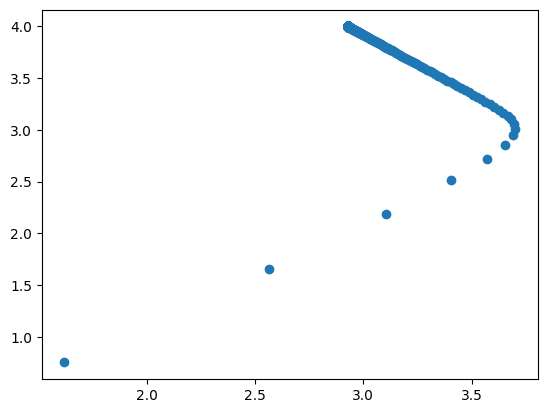

In [ ]:
plt.plot(list_a, list_b, 'o')

# DataLoader

In [ ]:
# PyTorch 에서 제공하는 편의함수..
# data feeding
t = torch.arange(30).reshape(15, 1, 1)
w = torch.arange(15)
dataset = list(zip(t, w))

len(dataset) # 15
dataset[0][0].shape #(1, 1)
dataset[0][1].shape #()

torch.Size([4])

In [ ]:
#epoch - 학습데이터 전체를 다 적용
#batch - 일부를 가져온 것
#batch_size - 일부를 가져오는 크기
#steps - 1 epoch의 학습 횟수
#전체 샘플의 개수 = batch_size * steps -> 1 epoch
#ex) 5000, batch_size=100
#1 epoch를 위해 50 steps가 필요하다.

